In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from scipy.spatial.distance import cdist
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
#Loading Data
df = pd.read_csv('Data/credit_card.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [3]:
#Scaling Data for kmeans clustering
scaled_df = StandardScaler().fit_transform(df)
scaled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,...,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,...,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,...,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,...,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,...,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.582254,0.822928,0.675781,-0.436159,0.339986,-0.211684,0.974073,-0.390541,0.960755,1.355617,...,0.814716,-0.270513,0.367525,-0.088748,0.237025,-1.341345,0.139345,-0.321884,-1.174255,-0.294421
9996,-0.698262,0.165437,1.081422,-0.358389,0.680357,-1.081387,0.501505,-0.183794,0.417743,-0.314791,...,-0.233550,-0.472572,-1.408476,-0.474189,0.435388,0.174699,-0.266039,-0.080968,-0.507701,-0.309647
9997,-1.414777,-0.618350,1.992252,-1.944731,-0.344833,-0.355713,-0.631952,0.059212,3.483615,-0.631703,...,-0.307809,-0.341595,1.258769,-1.745143,0.963114,1.413275,-0.319949,0.927441,-0.675591,-0.191782
9998,0.243406,-0.143847,-0.412310,0.410330,1.823885,3.221485,-0.476516,0.691276,0.544611,0.187903,...,0.599442,0.191866,1.413804,0.400581,1.603386,-2.899046,-0.703646,0.333142,0.155375,-0.019007


In [4]:
scaled_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.000000,4.618528e-18,4.263256e-18,-1.136868e-17,1.278977e-17,-1.563194e-17,2.842171e-18,7.105427e-19,2.273737e-17,2.273737e-17,...,8.526513e-18,-1.421085e-18,0.000000,-1.136868e-17,0.000000,1.918465e-17,2.273737e-17,2.842171e-18,-1.243450e-17,2.664535e-18
std,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050,1.000050e+00,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-18.006687,-2.654351e+01,-1.411218e+01,-3.466114e+00,-2.729091e+01,-1.817718e+01,-2.455962e+01,-1.877204e+01,-6.124311e+00,-1.180159e+01,...,-2.235822e+01,-1.257202e+01,-13.244909,-3.085679e+01,-4.273688,-6.182844e+00,-2.599772e+00,-1.971446e+01,-1.310692e+01,-3.483590e-01
25%,-0.507861,-3.784986e-01,-4.253777e-01,-6.165018e-01,-4.985775e-01,-5.796205e-01,-4.337502e-01,-1.008889e-01,-6.342085e-01,-4.229124e-01,...,-3.032860e-01,-2.353380e-01,-0.628531,-2.905271e-01,-0.586666,-5.774739e-01,-7.788192e-01,-2.242983e-01,-6.975227e-02,-3.193112e-01
50%,-0.085099,6.782439e-03,2.986867e-02,-3.808745e-02,-8.175830e-02,-2.152805e-01,1.484037e-02,6.157779e-02,3.294826e-03,-1.062683e-01,...,-8.676946e-02,-7.803955e-02,0.020153,-2.883205e-02,0.103214,7.637644e-02,-1.192856e-01,-2.757235e-02,5.005397e-02,-2.622415e-01
75%,0.919997,4.796908e-01,5.950950e-01,5.941939e-01,3.578826e-01,2.849753e-01,5.010253e-01,2.629713e-01,6.045470e-01,3.585611e-01,...,2.186046e-01,9.824494e-02,0.627215,2.339274e-01,0.659588,6.376485e-01,6.476346e-01,2.763214e-01,2.820298e-01,-6.125551e-02
max,1.454644,6.354564e+00,2.735690e+00,7.126675e+00,2.910371e+01,1.637432e+01,3.187847e+01,4.083320e+00,8.215687e+00,1.135921e+01,...,1.341121e+01,2.495048e+01,7.426276,2.839192e+01,5.377278,1.262788e+01,6.132634e+00,2.036787e+01,1.812750e+01,4.129275e+01


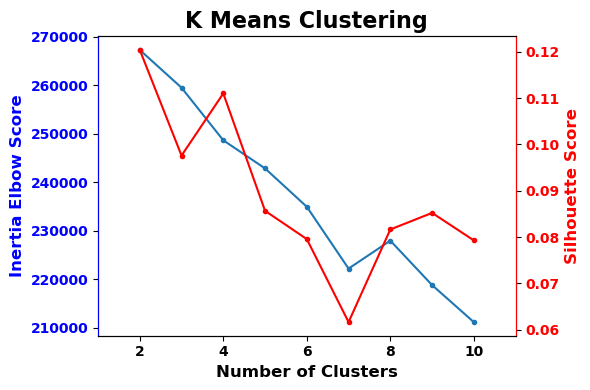

In [5]:
#Plotting inertias elbow score and silhouette score to determine how many clusters is best
inertias = []
silhouette_scores = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('K Means Clustering' , fontsize = 16 , weight='bold')

ax1.plot(range(2,11), inertias, marker='.')
ax1.set_ylabel('Inertia Elbow Score', color='blue', fontsize=12, weight='bold')
plt.xlabel('Number of Clusters', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_ticks(np.arange(0, 12, 2))

plt.xlim([1,11])

ax2 = ax1.twinx()
ax2.plot(range(2,11), silhouette_scores, color='r', marker='.')
ax2.set_ylabel('Silhouette Score', color='r', fontsize=12, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax2.tick_params(axis='y', labelcolor='r')
ax2.spines['right'].set_color('r')

ax2.spines['left'].set_color('blue');

plt.tight_layout()
plt.show;

- I will be using 4 clusters for KMeans clustering because the silhouette score performed the best at 4 clusters. The inertia elbow score shows 7 clusters will be good but the silhouette score performed very poorly so I would consider 7 clusters to be the secondary.

In [8]:
kmeans = KMeans(n_clusters = 4, n_init = 'auto', random_state = 42)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [9]:
cluster_centers = kmeans.cluster_centers_
distances = cdist(scaled_df, cluster_centers)
distances

array([[4.09828951, 4.67610754, 2.81553551, 5.86402321],
       [4.30688539, 3.62590019, 2.40380943, 5.07287401],
       [7.15166836, 7.51416231, 6.55418873, 8.64402717],
       ...,
       [6.86138822, 6.34481542, 7.2679919 , 8.27330256],
       [5.78095963, 6.60888023, 6.82448192, 4.97203292],
       [4.44379977, 3.59334055, 4.87792795, 5.7389043 ]])

In [11]:
min_dist = np.min(distances, axis=1)
min_dist

array([2.81553551, 2.40380943, 6.55418873, ..., 6.34481542, 4.97203292,
       3.59334055])

In [12]:
threshold = np.percentile(min_dist, 99.6)
threshold

20.676457649686633

In [13]:
kmeans_filter = min_dist > threshold
anomalies = df[kmeans_filter]
anomalies

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
159,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04
1376,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,-1.004398,...,-2.203676,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03
1619,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,-2.636622,...,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43
2156,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,-1.854230,...,7.314347,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00
2212,-5.149638,4.261740,-1.043112,-2.872586,-0.970562,2.037714,-4.472909,-14.892657,1.713550,0.090612,...,-3.235393,14.718212,-4.432106,2.075999,-0.025098,0.042432,-0.045874,0.619351,0.287509,4.00
2439,-12.168192,-15.732974,-0.376474,3.792613,10.658654,-7.465603,-6.907038,1.573722,0.058164,-0.421881,...,4.469095,1.660209,-0.910516,0.010468,-0.097246,-0.329918,0.225916,0.201802,-2.368534,120.00
2594,-2.574940,-2.669331,-3.080133,2.043551,-11.416881,7.885721,12.219249,-1.828209,-1.475925,-1.965803,...,0.828357,-0.115580,0.264090,2.219739,-0.771131,0.145438,-0.240517,1.180441,-0.623651,2909.97
2654,-7.546256,3.051033,-0.524684,1.005228,0.040486,2.751676,-6.267406,-19.176657,1.049976,0.521925,...,-3.785808,9.639417,-3.053597,2.648404,0.429294,0.300704,-0.273082,1.300662,-0.641413,29.90
2756,-10.780565,-9.940571,1.703409,3.094958,7.929119,-4.032777,-8.945496,-5.099389,2.297646,-0.234243,...,-4.829446,-4.399837,1.633000,-0.711629,0.645921,-0.549247,0.704801,3.372603,-1.307732,85.00
2911,-4.344234,4.268511,-1.580163,0.272536,-1.419244,2.603639,-11.164794,-23.632502,-1.849347,-5.217814,...,5.851381,-11.273890,3.661957,-0.200435,0.920605,0.619883,-0.381170,-0.132891,0.539894,1.00


In [16]:
iso = IsolationForest(contamination=.004, random_state=42)
iso.fit(df)

C:\Users\carlo\anaconda3\envs\dojo-env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.004, random_state=42)

In [17]:
predictions = iso.predict(df)
predictions[:5]

array([1, 1, 1, 1, 1])

In [22]:
iso_filter = predictions == -1
iso_anomalies = df[iso_filter]
iso_anomalies

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
159,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04
1619,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,-2.636622,...,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43
2156,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,-1.854230,...,7.314347,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00
2756,-10.780565,-9.940571,1.703409,3.094958,7.929119,-4.032777,-8.945496,-5.099389,2.297646,-0.234243,...,-4.829446,-4.399837,1.633000,-0.711629,0.645921,-0.549247,0.704801,3.372603,-1.307732,85.00
2858,-4.508547,5.050932,-2.114599,0.265771,1.263230,0.474670,-3.704011,-12.668590,0.344009,-0.674270,...,-2.574071,12.194849,-4.266839,0.500497,-0.100951,-0.265935,-0.472904,1.055836,0.504921,2.29
2914,-5.390190,5.141127,-2.456760,-1.433851,-2.132299,2.693505,-9.704282,-23.179640,-1.747019,-6.042641,...,5.580590,-11.102491,4.359627,1.943902,0.778397,-0.705948,-1.005957,-0.016154,0.522824,1.00
2917,-5.948482,5.573239,-2.932061,-1.450307,-2.521964,2.641657,-10.045540,-22.746370,-1.726559,-5.962109,...,5.593471,-11.092565,4.327552,2.009214,0.774036,-0.630253,-0.998636,-0.031049,0.518083,7.50
2923,-6.200114,5.025406,-2.742492,-0.940903,-6.656259,5.432294,-9.198175,-22.588547,-3.244295,-5.453339,...,4.592909,-11.235266,4.393846,1.943002,0.846005,-1.343379,-0.707634,-0.210219,0.066529,544.62
5303,-8.733429,-5.681953,2.253879,3.930311,-0.916149,4.355297,5.400286,-4.994383,6.819787,6.764860,...,-5.571503,-2.626882,1.525158,-1.428302,-0.030181,-0.029485,-0.264455,-7.976100,4.712560,553.60
5412,-8.053149,7.045990,-1.102994,-0.870690,-1.360528,4.754590,-7.669995,-23.464595,3.056101,2.085637,...,-4.578147,22.565680,-8.420246,3.511462,-0.526480,0.276928,0.207147,1.180975,0.194628,5.49


In [24]:
agree_filter = iso_filter & kmeans_filter
agree_anomaly = df[agree_filter]
percent_agree = 100 * len(agree_anomaly) / len(df)
print(f'Of {len(iso_anomalies)} samples that each model identified as anomalous, they agree on {len(agree_anomaly)}. This is {percent_agree}% of the total data')

Of 40 samples that each model identified as anomalous, they agree on 27. This is 0.27% of the total data
